#### SMOTE : Synthetic Minority Oversampling Technique

Used when the minority class has significantly fewer instances than the majority class

In [8]:
from sklearn.datasets import make_classification

In [9]:
x,y = make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,weights=[0.90],n_redundant=0,random_state=21)

In [10]:
print(x)
print(y)

[[-0.63744861  0.91905292]
 [ 1.74929402  0.68040021]
 [-0.24292842  1.8743476 ]
 ...
 [-1.17673192  1.17437087]
 [ 2.55751017  0.08441663]
 [ 1.27036251  0.87669472]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 

In [11]:
import pandas as pd

In [12]:
df1 = pd.DataFrame(x,columns=["f1",'f2'])
df2 = pd.DataFrame(y,columns=["target"])

In [13]:
df1

,f1,f2
0,-0.637449,0.919053
1,1.749294,0.680400
2,-0.242928,1.874348
3,0.098400,0.944039
4,2.371310,0.304431
...,...,...
995,0.144527,1.319968
996,-0.322175,2.187251
997,-1.176732,1.174371
998,2.557510,0.084417


In [14]:
df2

,target
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [15]:
df = pd.concat([df1,df2],axis=1)

In [16]:
df.head()

,f1,f2,target
0,-0.637449,0.919053,0
1,1.749294,0.680400,0
2,-0.242928,1.874348,0
3,0.098400,0.944039,0
4,2.371310,0.304431,0


In [17]:
df["target"].value_counts()

target
0    894
1    106
Name: count, dtype: int64

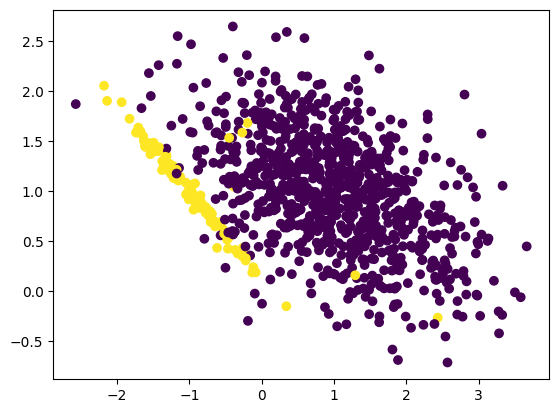

In [18]:
import matplotlib.pyplot as plt

plt.scatter(df['f1'],df['f2'],c=df['target'])

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
oversample = SMOTE()

In [21]:
X,Y = oversample.fit_resample(df[["f1","f2"]],df["target"])

In [27]:
X.shape

(1788, 2)

In [28]:
Y.shape

(1788,)

In [29]:
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(Y,columns=["target"])
oversample_df = pd.concat([df1,df2],axis=1)

In [30]:
oversample_df

,f1,f2,target
0,-0.637449,0.919053,0
1,1.749294,0.680400,0
2,-0.242928,1.874348,0
3,0.098400,0.944039,0
4,2.371310,0.304431,0
...,...,...,...
1783,-0.933765,0.839909,1
1784,-0.864071,0.856490,1
1785,-1.331333,1.318879,1
1786,-0.181230,0.293950,1


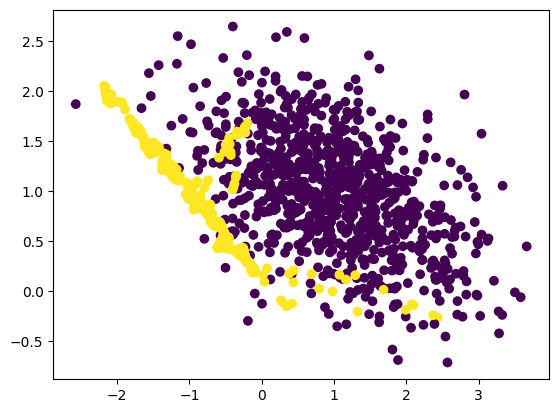

In [36]:
plt.scatter(oversample_df["f1"],oversample_df['f2'],c=oversample_df["target"])


In [32]:
oversample_df.shape

(1788, 3)

In [34]:
oversample_df["target"].value_counts()

target
0    894
1    894
Name: count, dtype: int64